# Notebook 3 B - Tutorial: Overfitting

First, we generate again a data set for the sine curve (8 data points with noise with a standard deviation of 1; see tasks 3-A). Simply execute this first cell.

In [1]:
import numpy as np

def generate_sine_data(n_points, noise=0.2):
    """
    Generates a synthetic dataset based on the sine function with added noise.

    Parameters:
    n_points (int): The number of data points to generate.
    noise (float): The standard deviation of the noise to add to the sine values.

    Returns:
    tuple: Two numpy arrays, x and y, where x is in the range [0, 2*pi] and
           y is the sine of x with added noise.
    """
    # Generate linearly spaced x values between 0 and 2*pi
    x = np.linspace(0, 2 * np.pi, n_points)
    
    # TODO: Compute the sine on the x values and add some noise
    # Create the y values in return.
    # Compute the sine of each x value
    y = np.sin(x)
    # Add random noise to y values
    y += np.random.normal(0, noise, size=n_points)
    
    return x, y

# Generate Data Set
x_train, y_train = generate_sine_data(8, 0.3)
x_sine, y_sine = generate_sine_data(100, 0.0)


### Polynomial in scikit-learn

Next, we use the implementation of a polynomial from scikit-learn. This includes two parts:

1. **Feature Transformation:** Use 'PolynomialFeatures' to transform the original input features into polynomial features up to a specified degree.
2. **Linear Regression**: Apply 'LinearRegression' to fit a linear model in the transformed polynomial feature space. The model learns the coefficients for each polynomial term, enabling it to capture the polynomial relationship in the original input data. For further explanation [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Together, these steps allow scikit-learn to learn a polynomial regression model by converting the problem into a linear regression task in a higher-dimensional feature space.

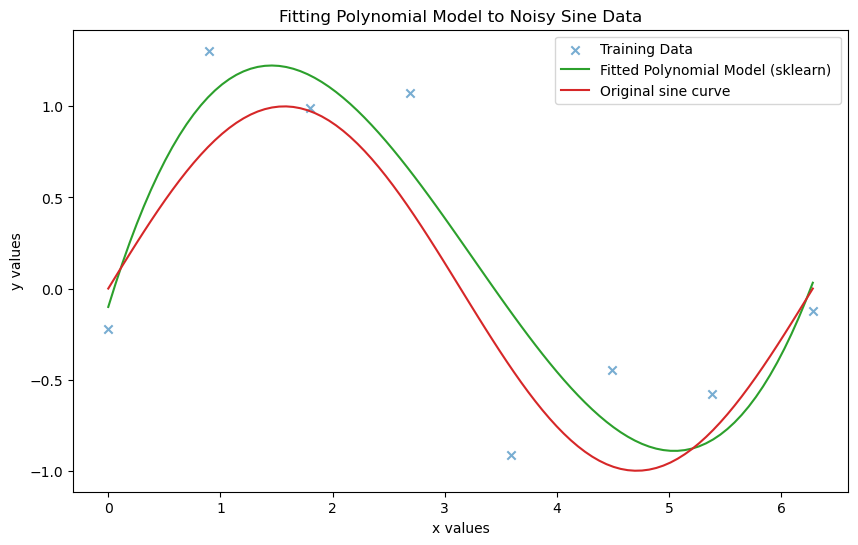

Polynomial Model (Degree 3) MSE    : 0.1362
MSE between y_train and real values: 0.1621


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Reshape x to be a 2D array for sklearn
x_train = x_train.reshape(-1, 1)
x_sine = x_sine.reshape(-1, 1)

# Polynomial Regression Model (for example, degree 3)
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_sine_poly = poly_features.fit_transform(x_sine)

polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly, y_train)
y_pred = polynomial_model.predict(x_train_poly)
y_sine_pred = polynomial_model.predict(x_sine_poly)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_sine, y_sine_pred, label='Fitted Polynomial Model (sklearn) ', color='C2')            
plt.plot(x_sine, y_sine, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting Polynomial Model to Noisy Sine Data')
plt.legend()
plt.show()

# Calculate Mean Squared Error for both models
mse_poly = mean_squared_error(y_train, y_pred)
_, y_train_no_noise = generate_sine_data(8, 0.0)
mse_real_comp = mean_squared_error(y_train, y_train_no_noise)

# Print the MSE for comparison
print(f"Polynomial Model (Degree 3) MSE    : {mse_poly:.4f}")
print(f"MSE between y_train and real values: {mse_real_comp:.4f}")

---

## 3.B.1 Comparison of fitting of different polynomials

The goal is to evaluate how the polynomial degree affects the model's ability to fit the training data by varying the polynomial degree from 1 to a higher number (e.g., 10 -- which would be sufficient for the $8$ data points in the example?). We will calculate the Mean Squared Error (MSE) for each polynomial degree and visualize the results in a plot. This will help understand how model complexity influences the fit and the training error.

**Task:**

Loop through polynomial degrees: Vary the polynomial degree from 1 to 10.

* In each iteration: Train a polynomial regression model for each degree using 'PolynomialFeatures' and 'LinearRegression'.
* Calculate the MSE for the training data predictions and store the MSE values for each degree.
* Plot the MSE values against the polynomial degree.

Degree 1: MSE = 0.4725
Degree 2: MSE = 0.4601
Degree 3: MSE = 0.1362
Degree 4: MSE = 0.1071
Degree 5: MSE = 0.1011
Degree 6: MSE = 0.1011
Degree 7: MSE = 0.0000
Degree 8: MSE = 0.0000
Degree 9: MSE = 0.0000
Degree 10: MSE = 0.0000


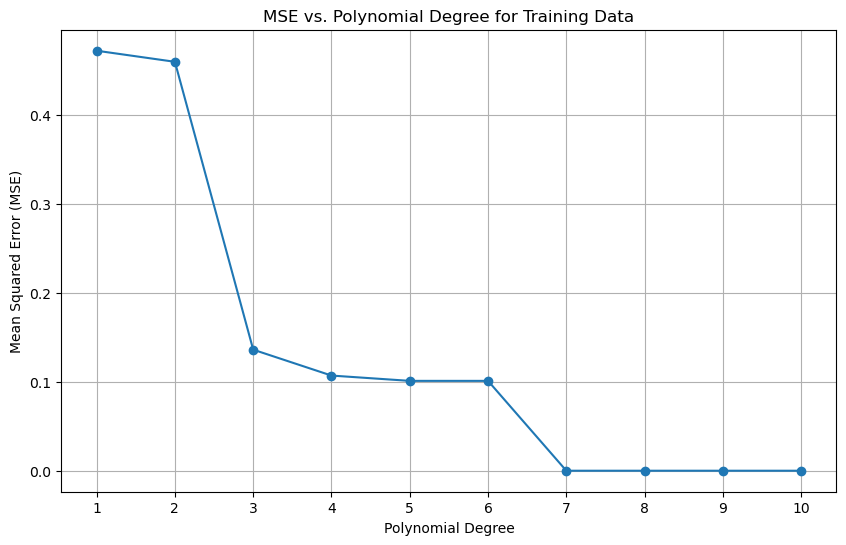

In [3]:
# Array to store MSE values for different polynomial degrees
mse_values = []

# Loop over polynomial degrees from 1 to 10
for degree in range(1, 11):
    # TODO: Create polynomial features and
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # TODO: Train the polynomial regression model
    polynomial_model = LinearRegression()
    polynomial_model.fit(x_train_poly, y_train)

    # TODO: Calculate MSE between the original y_train and the predicted values from x_train
    # and collect the MSE.
    # Predict using the trained model
    y_pred = polynomial_model.predict(x_train_poly)

    # Calculate the MSE for the current degree
    mse = mean_squared_error(y_train, y_pred)
    mse_values.append(mse)

    # Print MSE for each degree (optional)
    print(f"Degree {degree}: MSE = {mse:.4f}")

# TODO: Plot the MSE values for different polynomial degrees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker='o', linestyle='-', color='C0')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Polynomial Degree for Training Data')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


Above, there is already code for plotting the polynomial fitted curve. Test different degrees of polynoms and fit these to the data -- what do you observe?

**Task:**

* What are your observations?
    * How does the curve fit the training data?
    * How does it fit the original sine curve in your opinion?

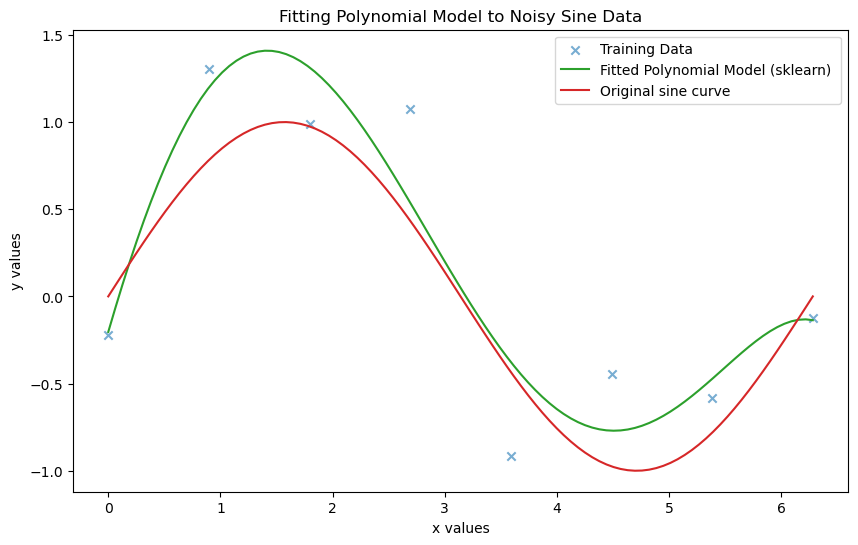

Polynomial Model (Degree 3) MSE    : 0.1011
MSE between y_train and real values: 0.1621


In [4]:
# Polynomial Regression Model (for example, degree 3)
poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_sine_poly = poly_features.fit_transform(x_sine)

polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly, y_train)
y_pred = polynomial_model.predict(x_train_poly)
y_sine_pred = polynomial_model.predict(x_sine_poly)

# Plot the noisy data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='C0', alpha=0.6, marker='x')
plt.plot(x_sine, y_sine_pred, label='Fitted Polynomial Model (sklearn) ', color='C2')            
plt.plot(x_sine, y_sine, label='Original sine curve ', color='C3')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Fitting Polynomial Model to Noisy Sine Data')
plt.legend()
plt.show()

# Calculate Mean Squared Error for both models
mse_poly = mean_squared_error(y_train, y_pred)
_, y_train_no_noise = generate_sine_data(8, 0.0)
mse_real_comp = mean_squared_error(y_train, y_train_no_noise)

# Print the MSE for comparison
print(f"Polynomial Model (Degree 3) MSE    : {mse_poly:.4f}")
print(f"MSE between y_train and real values: {mse_real_comp:.4f}")

#### Create randomly spaced training data (Optional)

As one further step: In the examples above, training data was created at equally spaced positons along the x-axis. In real data, these positions will usually be affected as well by noise or are not equally spaced. Generate a new training data set (same size) from random positions on the x-axis and calculate the corresponding sine values for these.

**Tasks:**

* Generate random positions along the x-axis.
* Run the same visualization from above (for different degrees) and analyze how the fitted model relates to the training data and to the real sine curve?

In [5]:
def generate_training_data_random_positions(n_points, noise=0.2):
    """
    Generates a synthetic dataset based on the sine function with added noise.

    Parameters:
    n_points (int): The number of data points to generate.
    noise (float): The standard deviation of the noise to add to the sine values.

    Returns:
    tuple: Two numpy arrays, x and y, where x is in the range [0, 2*pi] and
           y is the sine of x with added noise.
    """
    # Generate random x positions between 0 and 2*pi
    x = np.random.uniform(0, 2*np.pi, n_points)
    # You afterwards have to sort these values.
    x.sort()
    
    # Create the y values in return.
    # Compute the sine of each x value
    y = np.sin(x)
    # Add random noise to y values
    y += np.random.normal(0, noise, size=n_points)
    
    return x, y

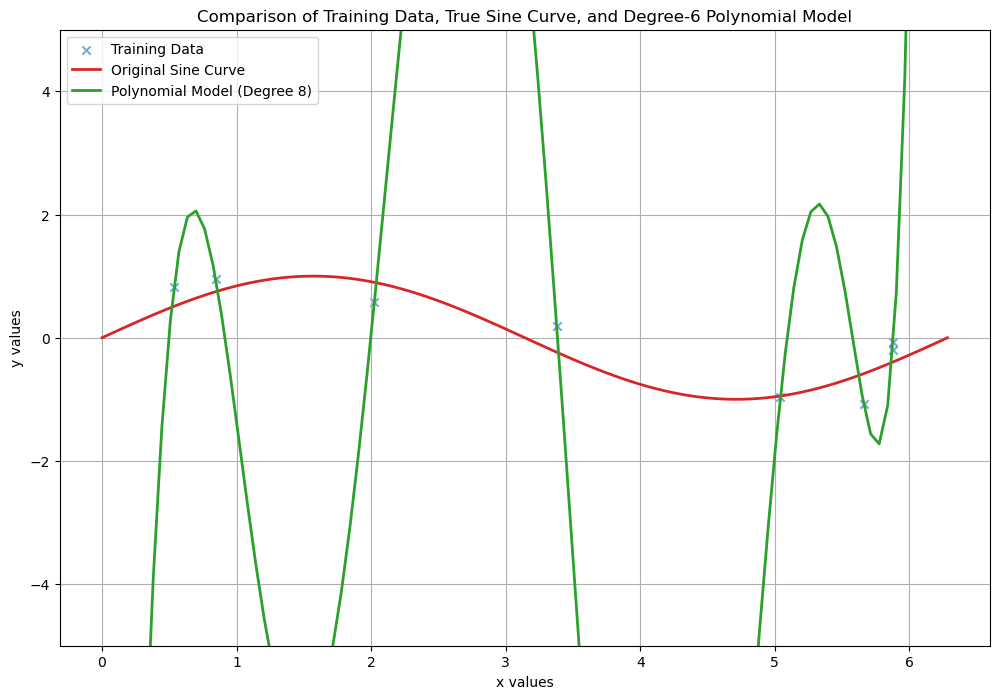

In [6]:
x_train_random_pos, y_train_random_pos = generate_training_data_random_positions(8, 0.3)
x_train_random_pos = x_train_random_pos.reshape(-1,1)

# Generate the polynomial features for degree 6
degree = 8
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train_random_pos)
x_sine_poly = poly_features.fit_transform(x_sine)

# Train the polynomial regression model for degree 6
polynomial_model = LinearRegression()
#polynomial_model.fit(x_train_poly, y_train)
polynomial_model.fit(x_train_poly, y_train_random_pos)

# Predict the output for both the training data and sine curve
y_train_pred = polynomial_model.predict(x_train_poly)
y_sine_pred = polynomial_model.predict(x_sine_poly)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot the training data
plt.scatter(x_train_random_pos, y_train_random_pos, label='Training Data', color='C0', alpha=0.6, marker='x')

# Plot the original sine curve
plt.plot(x_sine, np.sin(x_sine), label='Original Sine Curve', color='C3', linewidth=2)

# Plot the polynomial model's predictions
plt.plot(x_sine, y_sine_pred, label=f'Polynomial Model (Degree {degree})', color='C2', linewidth=2)

# Add labels, title, and legend
plt.xlabel('x values')
plt.ylim(-5, 5)
plt.ylabel('y values')
plt.title('Comparison of Training Data, True Sine Curve, and Degree-6 Polynomial Model')
plt.legend()
plt.grid()

# Show the plot
plt.show()


---

## 3.B.2 Testing Generalization Capabilities of a Model

The goal is to evaluate the generalization ability of the polynomial models trained in the previous task by testing them on a new test dataset. We will generate a new test dataset from the sine function, using the original distribution, with a larger number of points (e.g., 100). The trained polynomial models (with varying degrees) will be used to make predictions on this test dataset, and we will calculate the Mean Squared Error (MSE) for each model to see how well each polynomial degree generalizes to unseen data.

**Tasks:**

* generate a new test data set that wasn't used for training (same noise level, e.g., 100 data points)
* again, train polynomial models from degree $1$ up to $7$ on the 'x_train, y_train' data set and compute (as above) the training MSE for the different models,
* in addition, always evaluate each of these models on the test data set and store these values,
* plot both curves showing how the MSE develops in relation to the degree of the polynomial.

Degree 1: Train MSE = 0.4725, Test MSE = 0.3483
Degree 2: Train MSE = 0.4601, Test MSE = 0.3681
Degree 3: Train MSE = 0.1362, Test MSE = 0.1481
Degree 4: Train MSE = 0.1071, Test MSE = 0.1726
Degree 5: Train MSE = 0.1011, Test MSE = 0.1675
Degree 6: Train MSE = 0.1011, Test MSE = 0.1674
Degree 7: Train MSE = 0.0000, Test MSE = 1.1723


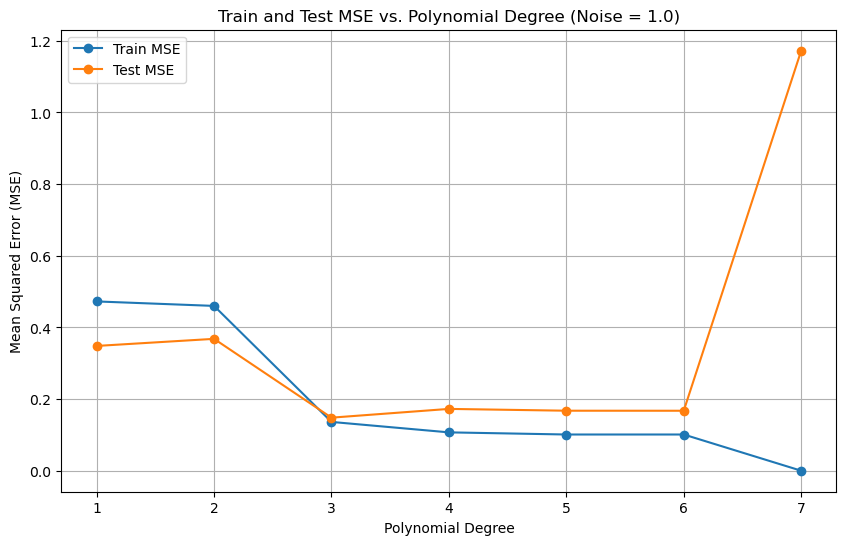

In [7]:
# TODO: Generate test data (100 points, noisy sine wave with noise level 0.3)
x_test, y_test = generate_sine_data(100, noise=0.3)
x_test = x_test.reshape(-1, 1)  # Reshape for sklearn

# Arrays to store MSE values for different polynomial degrees
mse_train_values = []
mse_test_values = []

# TODO: Evaluate polynomial models of varying degrees
for degree in range(1, 8):
    # Create polynomial features for the current degree
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    # Train the polynomial model
    polynomial_model = LinearRegression()
    polynomial_model.fit(x_train_poly, y_train)

    # Predict on the training and test data
    y_train_pred = polynomial_model.predict(x_train_poly)
    y_test_pred = polynomial_model.predict(x_test_poly)

    # Calculate the MSE for the training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store the MSE values
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Print MSE for each degree (optional)
    print(f"Degree {degree}: Train MSE = {mse_train:.4f}, Test MSE = {mse_test:.4f}")

# TODO: Plot the MSE values for both training and test data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), mse_train_values, marker='o', linestyle='-', color='C0', label='Train MSE')
plt.plot(range(1, 8), mse_test_values, marker='o', linestyle='-', color='C1', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train and Test MSE vs. Polynomial Degree (Noise = 1.0)')
plt.xticks(range(1, 8))
plt.legend()
plt.grid()
plt.show()


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 22.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>

---

## 3.B.3 Regularization

When fitting polynomial models to data, higher-degree models can perfectly fit the training data by capturing even the smallest fluctuations. This is known as **overfitting**, where the model learns the noise in the training data rather than the underlying pattern. In such cases, the model's weights (coefficients) tend to become very large, as it needs to assign high values to certain terms to achieve a perfect fit. This results in a model that generalizes poorly to new, unseen data because it is overly sensitive to the training data's specific details.

#### Why Do Weights Get Large in Overfitting?

- **High-degree polynomials** introduce more flexibility in the model, allowing it to fit every data point exactly.
- To achieve this perfect fit, the model assigns disproportionately large weights to the polynomial terms.
- These large weights indicate that the model is fitting the noise, leading to high variance and poor generalization to new data.

#### How Regularization (e.g., $L_2$) Can Help

- **Regularization techniques** like $L_2$ regularization (Ridge) add a penalty term to the model's loss function based on the size of the weights.
- In $L_2$ regularization, the penalty is proportional to the sum of the squares of the weights, discouraging the model from assigning excessively large values to any weight.
- By controlling the weight sizes, regularization forces the model to prioritize fitting the main trends in the data rather than the noise, leading to better generalization.

**Tasks:** 

Look at the Weights of Different Polynomial Models

- By examining the weights for polynomial models of varying degrees, you can observe that as the degree increases, the weights tend to become larger, especially without regularization.

When $L_2$ regularization is applied, the weights are kept smaller, even for higher-degree models, resulting in a more robust fit that generalizes better to test data (you can implement this using the ['Ridge' model from scikit-learn](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html)).

Regularization helps balance the model's complexity and prevents it from fitting the noise in the training data, making it more effective for real-world applications.


In [8]:
# TODO: Work in a for loop for the different degrees 
poly_features = PolynomialFeatures(degree=1)
x_train_poly = poly_features.fit_transform(x_train_random_pos)

# Train the polynomial model
polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly, y_train_random_pos)

# TODO: Access attributes of the polynomial_model object (the .coef_ and the .intercept_ = weight at position 0)
# print these weights 

LinearRegression()

In [9]:
# Arrays to store MSE values for different polynomial degrees
mse_train_values = []

# Evaluate polynomial models of varying degrees
for degree in range(1, 8):
    # Create polynomial features for the current degree
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train_random_pos)

    # Train the polynomial model
    polynomial_model = LinearRegression()
    #alpha = 
    #polynomial_model = Ridge(alpha=alpha)
    polynomial_model.fit(x_train_poly, y_train_random_pos)

    # Predict on the training and test data
    y_train_pred = polynomial_model.predict(x_train_poly)

    # Calculate the MSE for the training and test data
    mse_train = mean_squared_error(y_train_random_pos, y_train_pred)

    # Store the MSE values
    mse_train_values.append(mse_train)

    # Print MSE for each degree
    print(f"Degree {degree}: Train MSE = {mse_train:.4f}")
    
    # Print the weight values (coefficients and intercept)
    weights = polynomial_model.coef_
    weights[0] = polynomial_model.intercept_
    print(f"Coefficients: {weights}")
    print("-" * 50)


Degree 1: Train MSE = 0.1430
Coefficients: [ 1.07242196 -0.28529162]
--------------------------------------------------
Degree 2: Train MSE = 0.1370
Coefficients: [ 1.26472908 -0.48526604  0.03011324]
--------------------------------------------------
Degree 3: Train MSE = 0.0712
Coefficients: [ 0.15387108  1.51867297 -0.74926581  0.08095965]
--------------------------------------------------
Degree 4: Train MSE = 0.0361
Coefficients: [ 1.76703471 -2.27929054  1.64485122 -0.47091043  0.04203093]
--------------------------------------------------
Degree 5: Train MSE = 0.0137
Coefficients: [-1.04416334  5.87481175 -5.74186626  2.34232874 -0.42991048  0.02881635]
--------------------------------------------------
Degree 6: Train MSE = 0.0006
Coefficients: [ 1.18491635 -2.55555909  5.45552477 -4.41913885  1.58116871 -0.25761233
  0.01558476]
--------------------------------------------------
Degree 7: Train MSE = 0.0000
Coefficients: [-2.69241994e+02  1.18493071e+03 -1.88026930e+03  1.3988

### Regularization: Variation of Parameter

**Tasks:**

* Vary the $L_2$ weight in the code below and compare the different errors: training and test.
* Visualize the resulting curves as well for the polynomial and the regularized model.

In [10]:
from sklearn.linear_model import Ridge

degree = 8
# Create polynomial features for the current degree
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train_random_pos)
x_test_poly = poly_features.transform(x_test)

# Train the polynomial model
polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly, y_train_random_pos)

# TODO: vary the regularization parameter
alpha = 1.0
regularized_model = Ridge(alpha=alpha)
regularized_model.fit(x_train_poly, y_train_random_pos)

# Predict on training and test data
y_train_pred = polynomial_model.predict(x_train_poly)
y_train_regularized_pred = regularized_model.predict(x_train_poly)
y_test_pred = polynomial_model.predict(x_test_poly)
y_test_regularized_pred = regularized_model.predict(x_test_poly)

# Calculate the MSE for the training and test data
mse_train = mean_squared_error(y_train_random_pos, y_train_pred)
mse_train_regularized = mean_squared_error(y_train_random_pos, y_train_regularized_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test_regularized = mean_squared_error(y_test, y_test_regularized_pred)

# Print MSE for each degree
print(f"Degree {degree}: Train MSE = {mse_train:.4f}, Regularized MSE = {mse_train_regularized:.4f}")
print(f"Degree {degree}: Test MSE  = {mse_test:.4f}, Regularized MSE = {mse_test_regularized:.4f}")
    
# Print the weight values (coefficients and intercept)
print(f"Coefficients: {polynomial_model.coef_}")
print(f"Coeff. Regul: {regularized_model.coef_}")

Degree 8: Train MSE = 0.0000, Regularized MSE = 0.0019
Degree 8: Test MSE  = 172.0123, Regularized MSE = 0.8787
Coefficients: [-1.08897412e-05  1.15112379e+02 -6.95553269e+01 -9.64433843e+01
  1.36219755e+02 -6.56092035e+01  1.52540360e+01 -1.73213420e+00
  7.71114135e-02]
Coeff. Regul: [ 0.          0.00977661  0.00265807 -0.01236821 -0.02230598 -0.0109072
  0.01314687 -0.00323568  0.0002433 ]


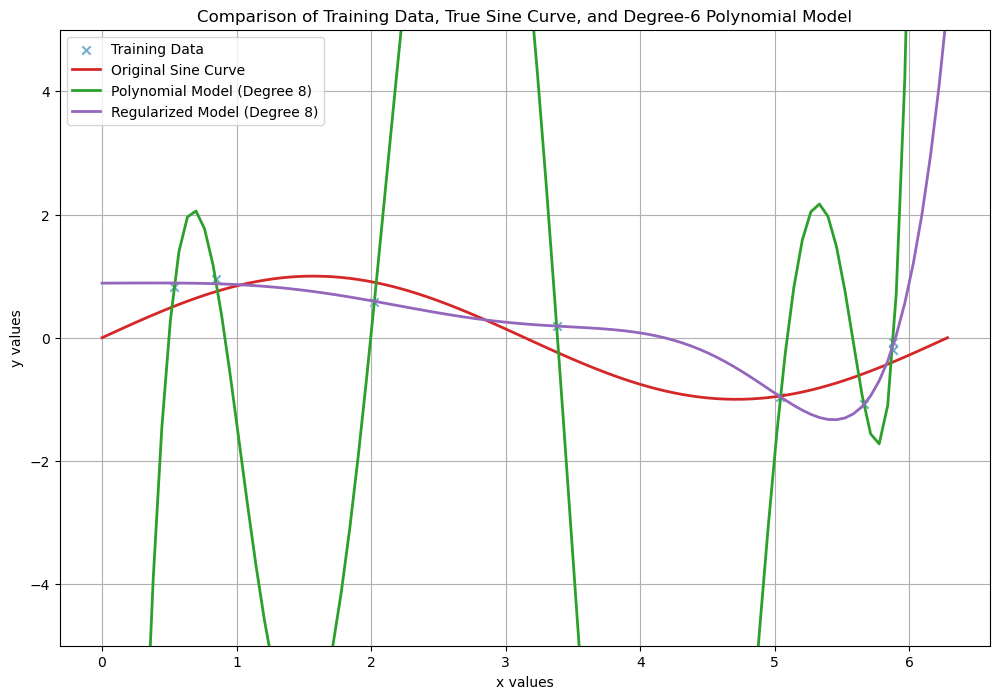

In [11]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Plot the training data
plt.scatter(x_train_random_pos, y_train_random_pos, label='Training Data', color='C0', alpha=0.6, marker='x')

# Plot the original sine curve
plt.plot(x_sine, np.sin(x_sine), label='Original Sine Curve', color='C3', linewidth=2)

# Plot the polynomial model's predictions
plt.plot(x_test, y_test_pred, label=f'Polynomial Model (Degree {degree})', color='C2', linewidth=2)
# Plot the polynomial model's predictions
plt.plot(x_test, y_test_regularized_pred, label=f'Regularized Model (Degree {degree})', color='C4', linewidth=2)

# Add labels, title, and legend
plt.xlabel('x values')
plt.ylim(-5, 5)
plt.ylabel('y values')
plt.title('Comparison of Training Data, True Sine Curve, and Degree-6 Polynomial Model')
plt.legend()
plt.grid()

# Show the plot
plt.show()


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 24.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>